# SALES PREDICITON



*   ***LOAD ALL THE LIBRARIES***
*   ***LOAD THE DATASET***
*   ***PERFORM THE EDA***
*   ***SPLIT THE DATASET***
*   ***REGRESSION ANALYSIS***
*   ***VERDICT***





## LOAD ALL THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## LOAD THE DATASET

In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## PERFORM THE EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### CHECKING FOR NULL VALUES

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### DATA VISULAIZATION

C:\Users\melvi\AppData\Local\Temp\ipykernel_19856\1349581025.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'],color='red')


<Axes: xlabel='TV', ylabel='Density'>

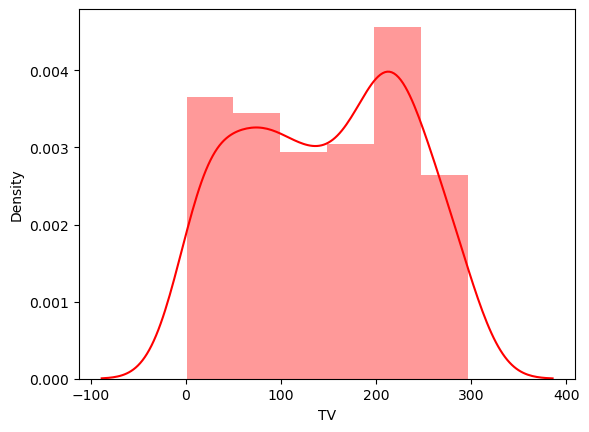

In [6]:
sns.distplot(df['TV'],color='red')

C:\Users\melvi\AppData\Local\Temp\ipykernel_19856\497969085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"])


<Axes: xlabel='Sales', ylabel='Density'>

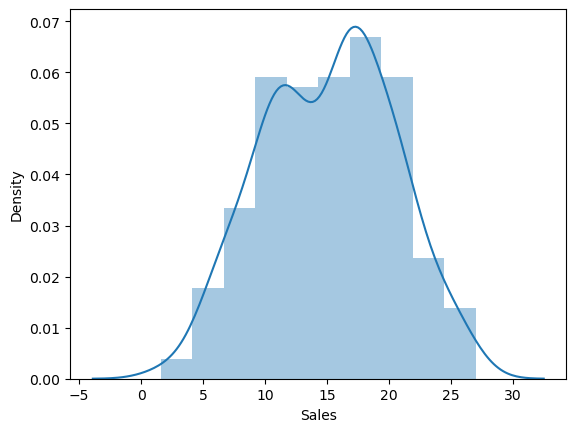

In [7]:
sns.distplot(df["Sales"])

<Axes: ylabel='Newspaper'>

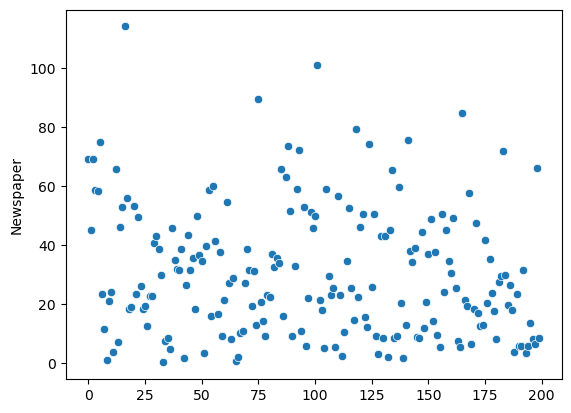

In [8]:
sns.scatterplot(df['Newspaper'])

<Axes: >

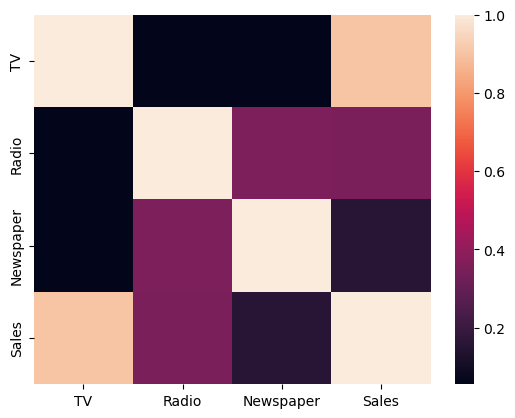

In [9]:
sns.heatmap(df.corr())

## SPLITTING THE DATASET

In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [27]:
x_train.head()

,TV,Radio,Newspaper
156,93.9,43.5,50.5
115,75.1,35.0,52.7
155,4.1,11.6,5.7
15,195.4,47.7,52.9
61,261.3,42.7,54.7


In [28]:
y_train.head()

156    15.3
115    12.6
155     3.2
15     22.4
61     24.2
Name: Sales, dtype: float64

## LINEAR REGRESSION

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
ypred_train_lr=lr.predict(x_train)
ypred_test_lr=lr.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
print("Mean Absolute Error : ",mean_absolute_error(y_train,ypred_train_lr))
print("Mean Absolute Error : ",mean_absolute_error(y_test,ypred_test_lr))

Mean Absolute Error :  1.2852516074879492
Mean Absolute Error :  1.0436595481340785


## RANDOM FOREST REGRESSOR

In [33]:
rfr=RandomForestRegressor(n_estimators=150,criterion='absolute_error')
rfr.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=150)

In [34]:
ypred_train_rfr=rfr.predict(x_train)
ypred_test_rfr=rfr.predict(x_test)

In [35]:
print("Mean Absolute Error : ",mean_absolute_error(y_train,ypred_train_rfr))
print("Mean Absolute Error : ",mean_absolute_error(y_test,ypred_test_rfr))

Mean Absolute Error :  0.35781041666666547
Mean Absolute Error :  0.7489999999999991


## VERDICT

**RANDOM FOREST REGRESSOR SHOWS LESS ERROR RATE**